In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
news = pd.read_csv("OnlineNewsPopularity.csv")

In [6]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [7]:
news.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [21]:
news.columns = [i.strip() for i in news.columns]

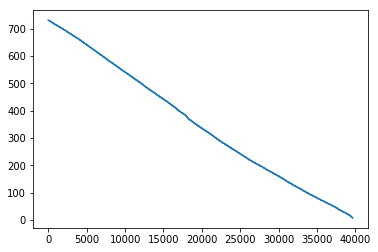

In [23]:
plt.plot(news['timedelta'])

In [63]:
news = news.drop(['timedelta','url'],axis=1)

# Number of words in the title

(array([3.4000e+01, 9.8900e+02, 6.3470e+03, 1.3636e+04, 1.2259e+04,
        5.2420e+03, 1.0150e+03, 1.1300e+02, 8.0000e+00, 1.0000e+00]),
 array([ 2. ,  4.1,  6.2,  8.3, 10.4, 12.5, 14.6, 16.7, 18.8, 20.9, 23. ]),
 <a list of 10 Patch objects>)

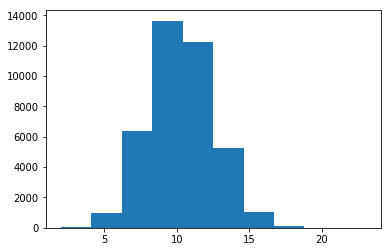

In [64]:
plt.hist(news['n_tokens_title'])

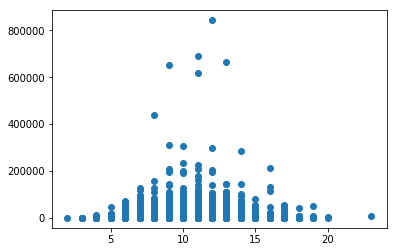

In [65]:
plt.scatter(news['n_tokens_title'],news['shares'])

In [66]:
# Number of words vs. Shares

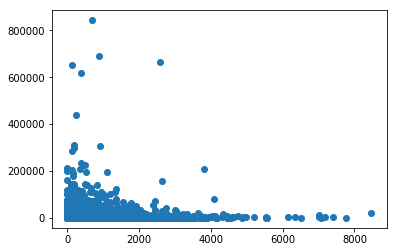

In [67]:
plt.scatter(news['n_tokens_content'],y=news['shares'])

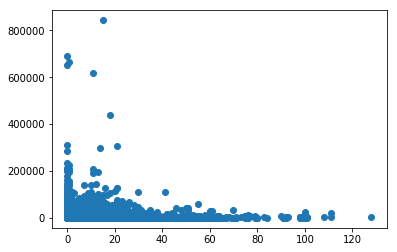

In [68]:
plt.scatter(news['num_imgs'],news['shares'])

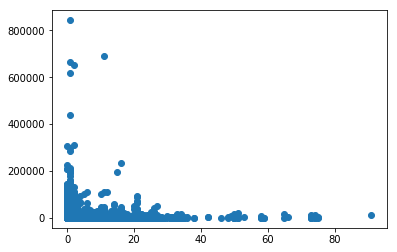

In [69]:
plt.scatter(news['num_videos'],news['shares'])

In [74]:
len(news.query('weekday_is_monday==1.0'))

6661

In [75]:
len(news.query('weekday_is_tuesday==1.0'))

7390

In [76]:
len(news.query('weekday_is_wednesday==1.0'))

7435

In [96]:
num_of_items_per_weekday = []
days_of_weeks = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
for i in days_of_weeks:
    que = 'weekday_is_'+i+'==1.0'
    num_of_items_per_weekday.append(len(news.query(que)))

In [97]:
num_of_items_per_weekday

[6661, 7390, 7435, 7267, 5701, 2453, 2737]

TypeError: unsupported operand type(s) for -: 'str' and 'float'

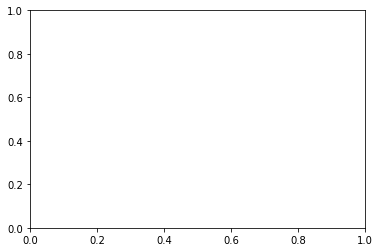

In [98]:
plt.bar(left=days_of_weeks,height=num_of_items_per_weekday)